In [14]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math
from datetime import datetime
import time
import os

In [3]:
with open("routesSample.json") as fp:
    data=json.load(fp)

In [15]:
data[0]['routeStates'][0]['vehicles'][0]

{'did': '1____O_F00',
 'heading': 260,
 'lat': 37.789883,
 'lon': -122.434303,
 'vid': '5621'}

## Example Visualizations

Depict buses of one route at one timepoint

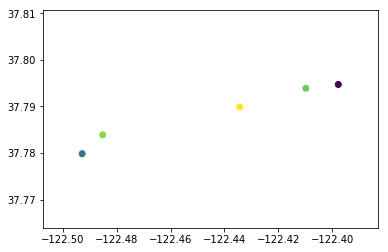

In [111]:
x1, y1, c1 = [*zip(*[(v['lon'],v['lat'],float(v['vid'])) for v in data[0]['routeStates'][0]['vehicles']])]
plt.scatter(x1,y1,c=c1)
plt.show()

Depict location of one bus over time. Here we use bus 5441 on Route 5 (`data[2]`) for its first 600 data points (150 minutes).

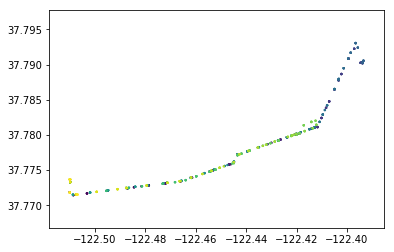

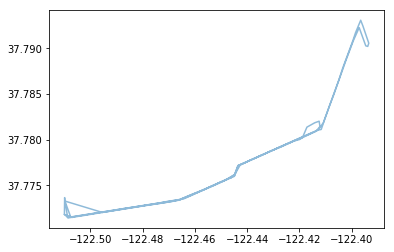

In [175]:
x2, y2, c2 = [],[],[]

for t in data[2]['routeStates'][:600]:
    for v in t['vehicles']:
        if v['vid'] == '5441':
            x2.append(v['lon'])
            y2.append(v['lat'])
            c2.append(int(t['vtime']))
            break
    
plt.scatter(x2,y2,c=c2,s=2)
plt.show()
plt.plot(x2,y2,lw=1.5,alpha=.5)
plt.show()

Depict all buses at a single timepoint, color-coded by route. Also show bus routes by plotting stops.

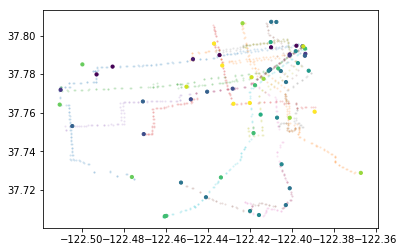

In [213]:
timestamp = data[0]['routeStates'][0]['vtime']
rids = [r['rid'] for r in data]

x3, y3, c3 = [],[],[]

for r in data:
    r_index = rids.index(r['rid'])
    for t in r['routeStates']:
        if t['vtime'] == timestamp:
            for v in t['vehicles']:
                x3.append(v['lon'])
                y3.append(v['lat'])
                c3.append(r_index)
            break
    sx,sy = [*zip(*[(s['lon'],s['lat']) for s in r['stops']])]
    plt.scatter(sx,sy,s=4,alpha=.2,linewidths=0)
    
plt.scatter(x3,y3,c=c3,s=10)
plt.show()